<a href="https://colab.research.google.com/github/ruthetum/Deeplearning-NLP/blob/master/SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Softmax Regression - 다중 클래스 분류

로지스틱 회귀 : 이진 분류

소프트맥스 회귀 : 3개 이상의 선택지 중 1개를 고르는 다중 클래스 분류

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1. 전처리 단계

* 데이터 불러오기

* 정수 인코딩

* train set과 test set 나누기

* 원-핫 인코딩

In [0]:
import pandas as pd
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/iris.csv', encoding='latin1')

In [18]:
print(len(data))
print(data[:5])

150
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [20]:
print("품종 종류:", data["variety"].unique(), sep="\n")

품종 종류:
['Setosa' 'Versicolor' 'Virginica']


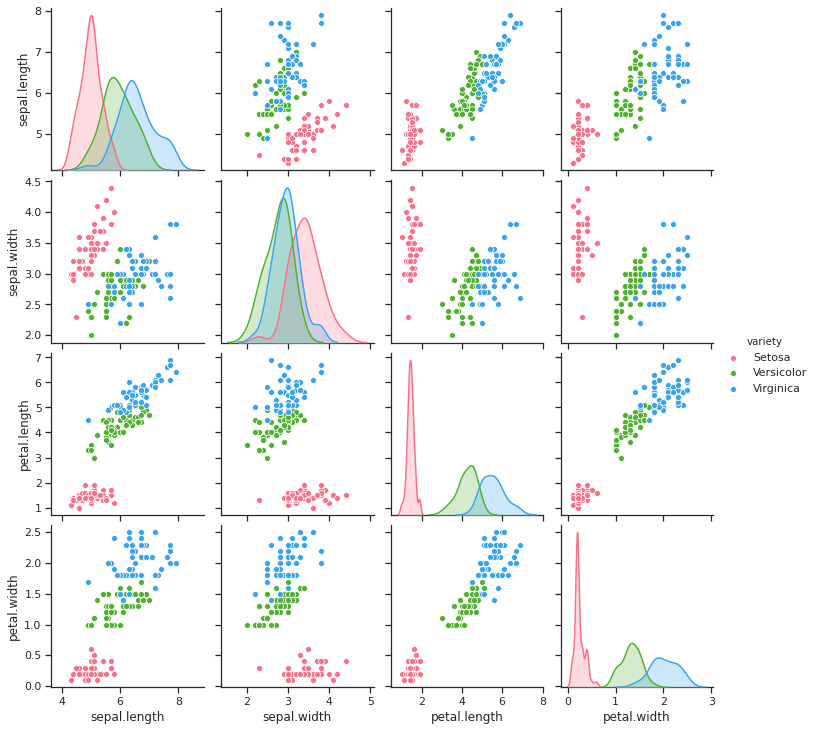

In [21]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="variety", palette="husl")

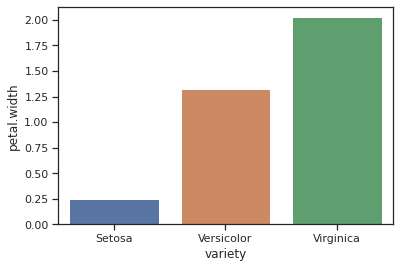

In [22]:
# 각 종과 특성에 대한 연관 관계
sns.barplot(data['variety'], data['petal.width'], ci=None)

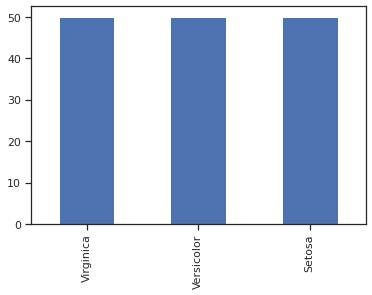

In [23]:
# 품종 별로 몇개씩 있는지 확인
import matplotlib.pyplot as plt
data['variety'].value_counts().plot(kind='bar')

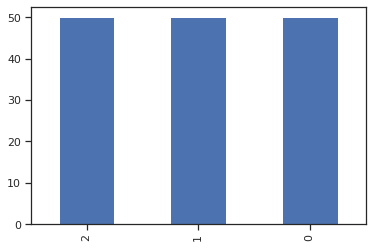

In [26]:
# virginica는 0, setosa는 1, versicolor는 2로 정수 인코딩
data['variety'] = data['variety'].replace(['Virginica','Setosa','Versicolor'],[0,1,2])
data['variety'].value_counts().plot(kind='bar')

In [27]:
from sklearn.model_selection import train_test_split
data_X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values # X 데이터 4개
data_y = data['variety'].values # Y 데이터.

print(data_X[:5]) #X에 해당되는 데이터를 5개만 출력
print(data_y[:5]) #y에 해당되는 데이터를 5개만 출력

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [0]:
# train : test = 8:2 + 순서 섞기 .
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

In [29]:
# train set, test set 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


여기까지가 전처리 단계

# 2. 소프트맥스 회귀

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax')) # 입력 차원 : 4, 출력 차원 : 3
sgd=optimizers.SGD(lr=0.01)
# 이진 분류에서는 binary_crossentropy 사용하지만 다중 분류에서는 categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) # adam사용, 손실함수 : cross entropy
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 3ms/sample - loss: 1.8310 - acc: 0.0833 - val_loss: 1.5691 - val_acc: 0.0000e+00
Epoch 2/200
120/120 [==============================] - 0s 1ms/sample - loss: 1.4064 - acc: 0.1000 - val_loss: 1.3755 - val_acc: 0.1000
Epoch 3/200
120/120 [==============================] - 0s 1ms/sample - loss: 1.2806 - acc: 0.2333 - val_loss: 1.3055 - val_acc: 0.2000
Epoch 4/200
120/120 [==============================] - 0s 1ms/sample - loss: 1.2084 - acc: 0.2667 - val_loss: 1.2443 - val_acc: 0.2333
Epoch 5/200
120/120 [==============================] - 0s 1ms/sample - loss: 1.1457 - acc: 0.2417 - val_loss: 1.1709 - val_acc: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 1ms/sample - loss: 1.0879 - acc: 0.2333 - val_loss: 1.1258 - val_acc: 0.2333
Epoch 7/200
120/120 [==============================] - 0s 1m

위의 에포크 과정에서

acc 는 train set에 대한 정확도

val_acc 는 test set에 대한 정확도

In [32]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

30/30 [==============================] - 0s 893us/sample - loss: 0.1933 - acc: 0.9667

 테스트 정확도: 0.9667
